# Credit Card Fraud Detection

This project is based on supervised machine learning where you will be predicting whether a credit card transaction is original transaction or fraud transaction based on various parameters. This is a classification problem.

## Problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, we will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.

## Business problem overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways.

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import plot_confusion_matrix

# Dataset Description

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.

- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Get the data

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Handling Missing Values

In [7]:
# Checking for the missing value present in each columns
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no missing value present in the dataframe.

# Discover and Visualize the Data 

In [8]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


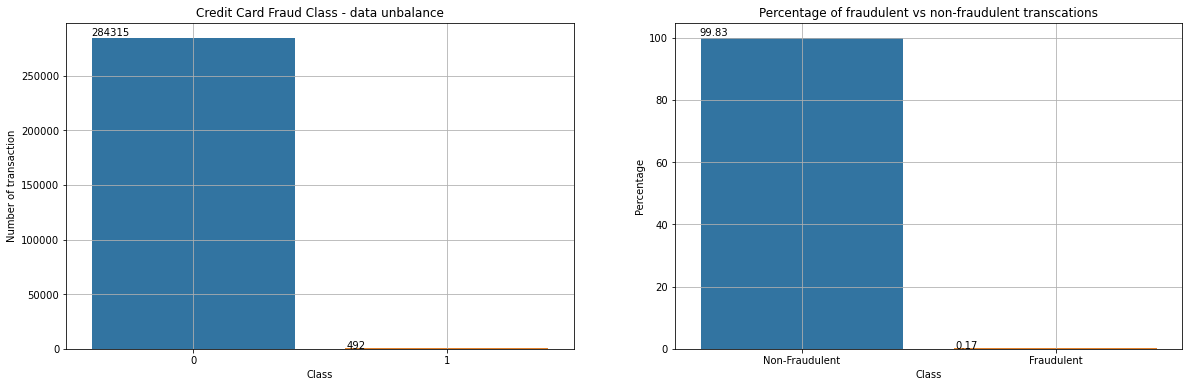

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
ax=sns.countplot(x=df["Class"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")
plt.grid()
plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
ax=sns.barplot(x='Class', y='Percentage', data=df_fraud_percentage)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.grid()

The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

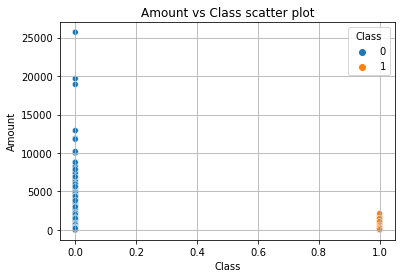

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df["Class"], y=df["Amount"], hue=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.grid()

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

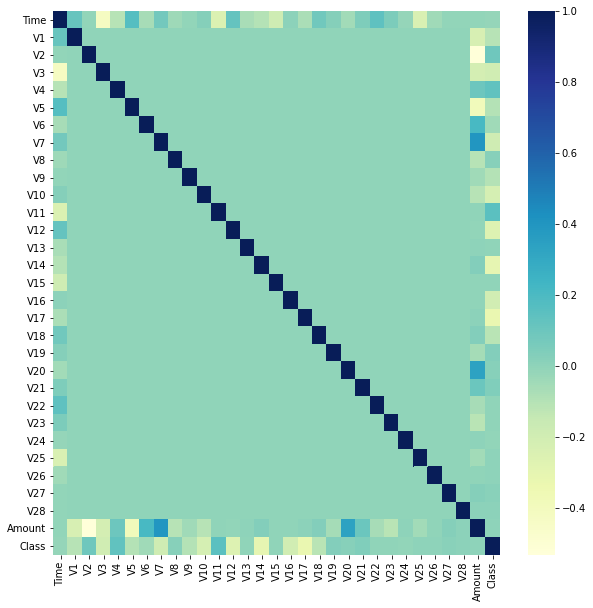

In [11]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

From the above heatmap,

- There is no notable correlation between features V1-V28.
- There are certain correlations between some of these features and Time (inverse correlation with V3).
- Features and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

<Figure size 432x288 with 0 Axes>

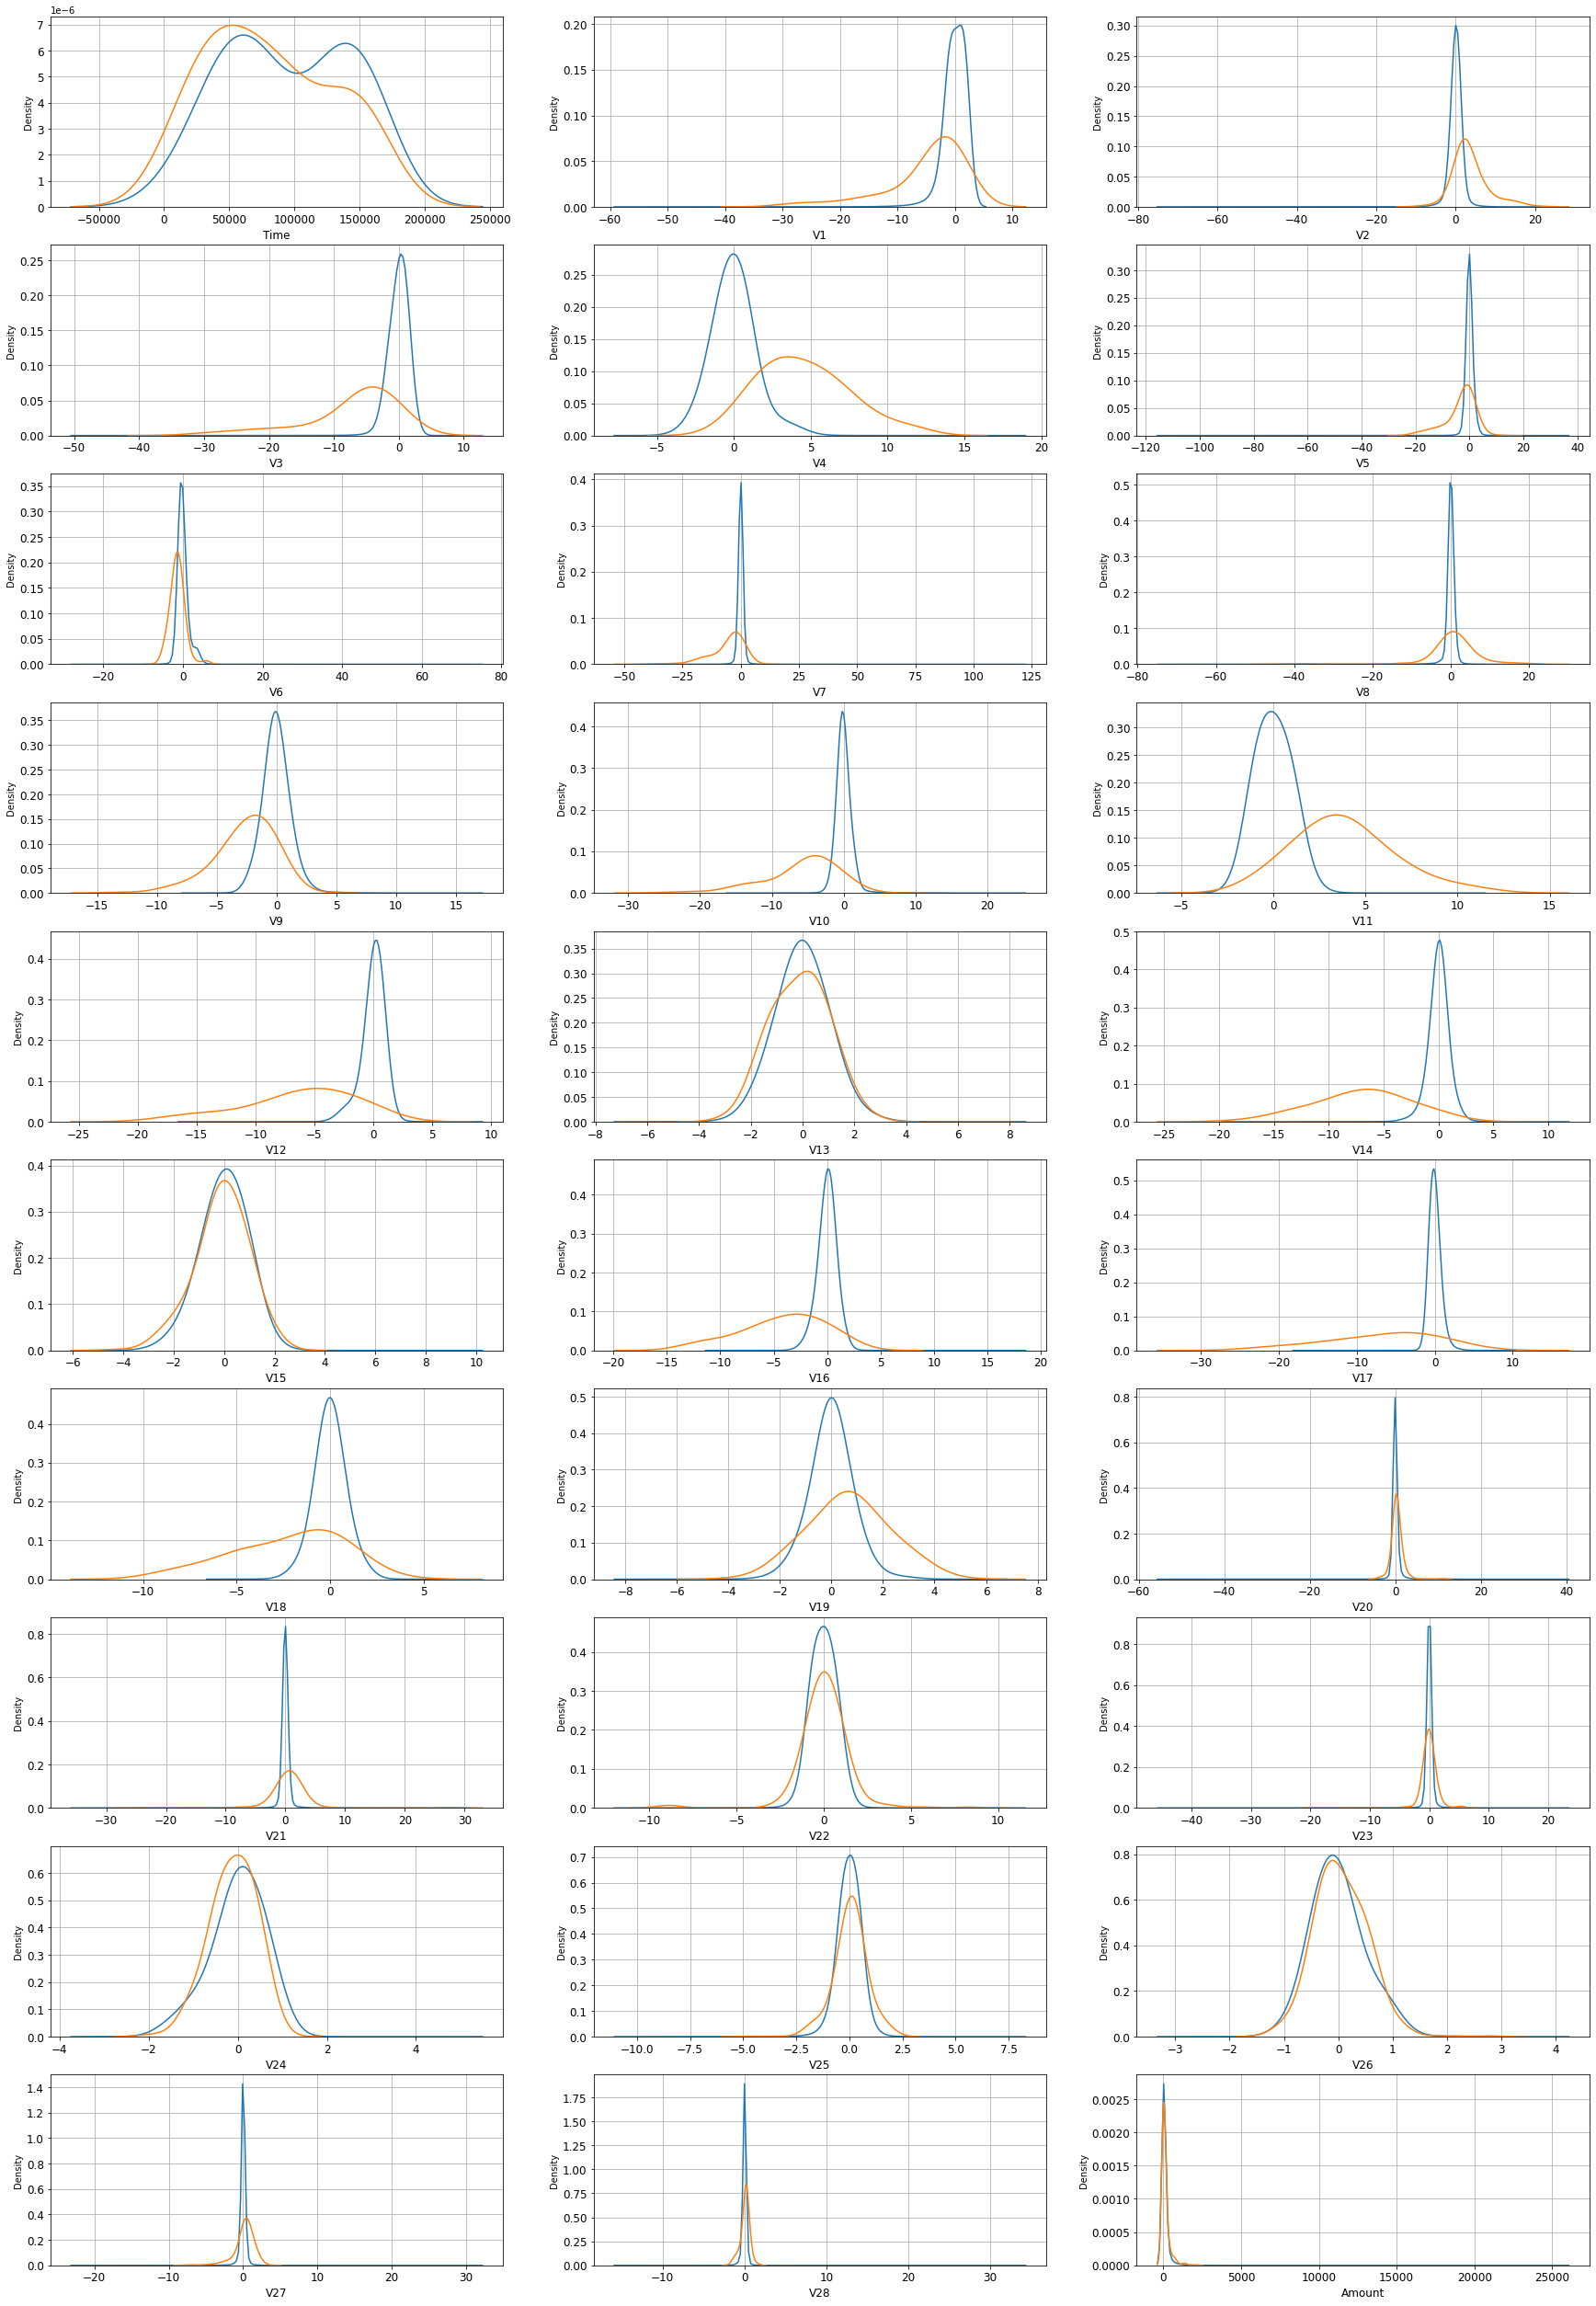

In [12]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(10,3,figsize=(30,45));

for feature in var:
    i += 1
    plt.subplot(10,3,i)
    sns.kdeplot(t0[feature], bw_method=0.5, label="0")
    sns.kdeplot(t1[feature], bw_method=0.5, label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
plt.show()

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

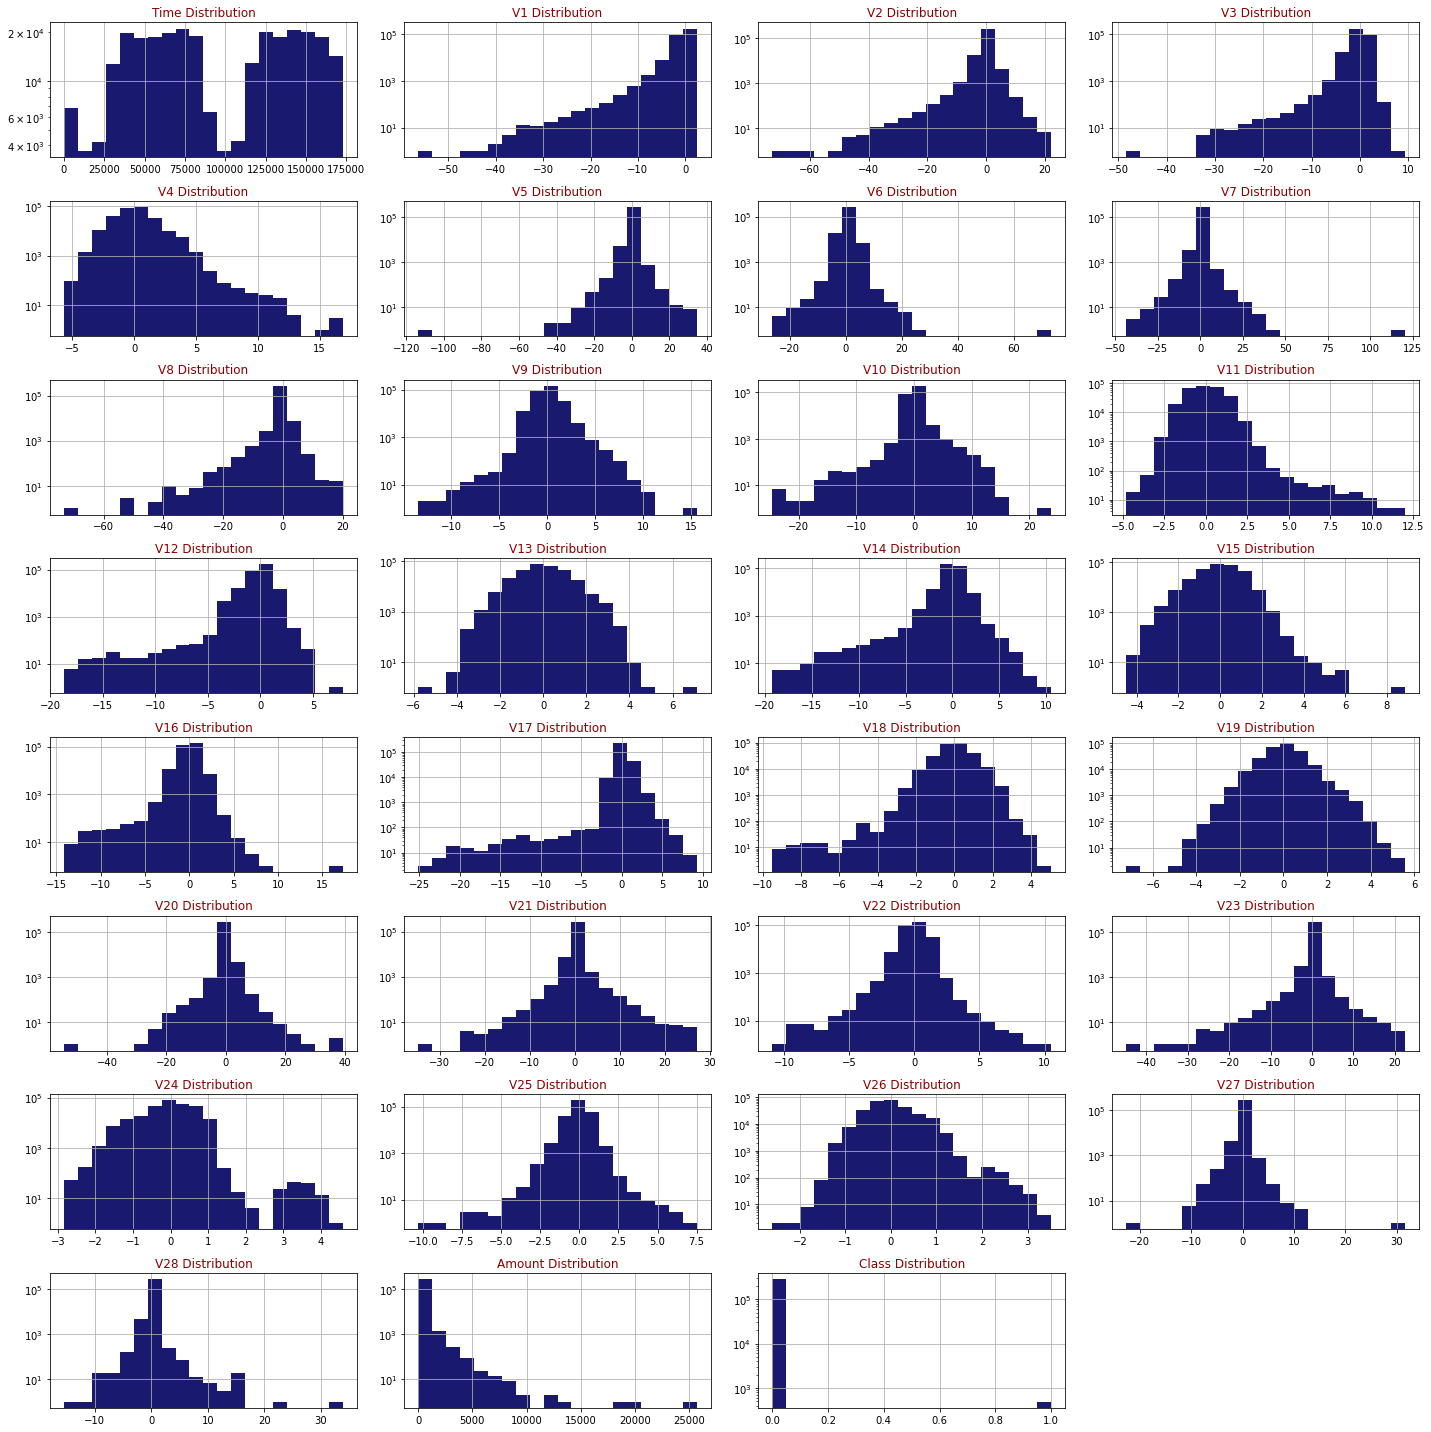

In [13]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,8,4)

# Prepare the data

- **PCA Transformation:** The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).
- **Scaling:** Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)

## Drop unnecessary columns

In [13]:
# Dropping Time column as this feature is not going to help in the model building
df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Amount'], axis=1, inplace=True)

In [15]:
scaled_amount = df['scaled_amount']

df.drop(['scaled_amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)

# Amount is Scaled!

df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [16]:
df.describe()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,3.495006,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


## Create a test set

### Stratified Split

We will apply Stratified Shuffle Split here. This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

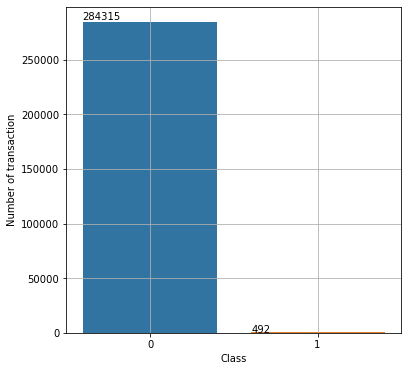

In [17]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x=df["Class"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.grid()

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Class"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [19]:
print("Original Non-Fraudulent : {} %".format(normal_share))
print("    Original Fraudulent : {} %".format(fraud_share))

Original Non-Fraudulent : 99.83 %
    Original Fraudulent : 0.17 %


In [20]:
strat_test_set["Class"].value_counts() / len(strat_test_set)

0    0.99828
1    0.00172
Name: Class, dtype: float64

In [21]:
strat_train_set["Class"].value_counts() / len(strat_train_set)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [22]:
original_Xtrain  = strat_train_set.drop("Class", axis=1) # drop labels for training set
original_ytrain  = strat_train_set["Class"].copy()

In [23]:
original_Xtest  = strat_test_set.drop("Class", axis=1) # drop labels for training set
original_ytest  = strat_test_set["Class"].copy()

In [24]:
original_ytrain.value_counts() 

0    227451
1       394
Name: Class, dtype: int64

In [25]:
original_ytest.value_counts() 

0    56864
1       98
Name: Class, dtype: int64

# Model Building

Working with below models:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier

**Metric selection on imbalance data** <br>
We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

## Logistic Regression Classifier

In [26]:
def logistic_regression_classifier(X_train, y_train, X_test, y_test):
    # initialize object for LogisticRegression class
    log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
    # train model by using fit method
    print("Model training starts........")
    log_reg.fit(X_train, y_train)
    print("Model training completed")
    accuracy_score_train = log_reg.score(X_train, y_train)
    print("Logistic Regression Classifier Accuracy Score on Train set: " + "{:.4%}".format(accuracy_score_train))
    accuracy_score_test = log_reg.score(X_test, y_test)
    print("Final result using test dataset:")
    print("Logistic Regression Classifier Accuracy Score on Test set: " + "{:.4%}".format(accuracy_score_test))
    y_pred = log_reg.predict(X_test)
    # confusion matrix
    print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
    # classification report for f1-score
    print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")
    y_pred_2 = log_reg.predict_proba(X_test)[:, 1]
    return y_pred_2

## Decision Tree Classifier 

In [27]:
def decision_tree_classifier(X_train, y_train, X_test, y_test):
    # initialize object for DecisionTreeClassifier class
    tree_cls = DecisionTreeClassifier()
    # train model by using fit method
    print("Model training starts........")
    tree_cls.fit(X_train, y_train)
    print("Model training completed")
    accuracy_score_train = tree_cls.score(X_train, y_train)
    print("Decision Tree Classifier Accuracy Score on Train set: " + "{:.4%}".format(accuracy_score_train))
    accuracy_score_test = tree_cls.score(X_test, y_test)
    print("Final result using test dataset:")
    print("Decision Tree Classifier Accuracy Score on Test set: " + "{:.4%}".format(accuracy_score_test))
    y_pred = tree_cls.predict(X_test)
    # confusion matrix
    print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
    # classification report for f1-score
    print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")
    y_pred_2 = tree_cls.predict_proba(X_test)[:, 1]
    return y_pred_2

## Random Forest Classifier

In [28]:
def random_forest_classifier(X_train, y_train, X_test, y_test):
    # initialize object for RandomForestClassifier class     
    rf_cls = RandomForestClassifier(n_estimators=50)
    # train model by using fit method
    print("Model training starts........")
    rf_cls.fit(X_train, y_train)
    print("Model training completed")
    accuracy_score_train = rf_cls.score(X_train, y_train)
    print("Random Forest Classifier Accuracy Score on Train set: " + "{:.4%}".format(accuracy_score_train))
    accuracy_score_test = rf_cls.score(X_test, y_test)
    print("Final result using test dataset:")
    print("Random Forest Classifier Accuracy Score on Test set: " + "{:.4%}".format(accuracy_score_test))
    y_pred = rf_cls.predict(X_test)
    # confusion matrix
    print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
    # classification report for f1-score
    print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")
    y_pred_2 = rf_cls.predict_proba(X_test)[:, 1]
    return y_pred_2

# Apply on Imbalanced data

In [29]:
# Distribution of Class column
df_train = pd.concat([original_Xtrain, original_ytrain], axis=1)

In [30]:
# Distribution of Class column
class_counts=df_train.Class.value_counts()
class_counts

0    227451
1       394
Name: Class, dtype: int64

Text(0, 0.5, 'counts')

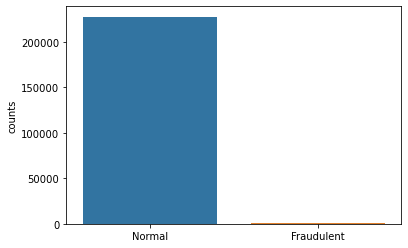

In [31]:
g=sns.barplot(x=class_counts.index,y=class_counts.values)
g.set_xticklabels(['Normal','Fraudulent'])
g.set_ylabel('counts')

## Logistic Regression Classifier

In [32]:
y_pred_logreg = logistic_regression_classifier(original_Xtrain, original_ytrain, original_Xtest, original_ytest)

Model training starts........
Model training completed
Logistic Regression Classifier Accuracy Score on Train set: 99.9241%
Final result using test dataset:
Logistic Regression Classifier Accuracy Score on Test set: 99.9175%
Confusion Matrix :- 
 [[56851    13]
 [   34    64]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



## Decision Tree Classifier

In [33]:
y_pred_decstr = decision_tree_classifier(original_Xtrain, original_ytrain, original_Xtest, original_ytest)

Model training starts........
Model training completed
Decision Tree Classifier Accuracy Score on Train set: 100.0000%
Final result using test dataset:
Decision Tree Classifier Accuracy Score on Test set: 99.9280%
Confusion Matrix :- 
 [[56845    19]
 [   22    76]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.78      0.79        98

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962



## Random Forest Classifier

In [34]:
y_pred_randfor = random_forest_classifier(original_Xtrain, original_ytrain, original_Xtest, original_ytest)

Model training starts........
Model training completed
Random Forest Classifier Accuracy Score on Train set: 99.9991%
Final result using test dataset:
Random Forest Classifier Accuracy Score on Test set: 99.9596%
Confusion Matrix :- 
 [[56859     5]
 [   18    80]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



## Plot ROC Curve

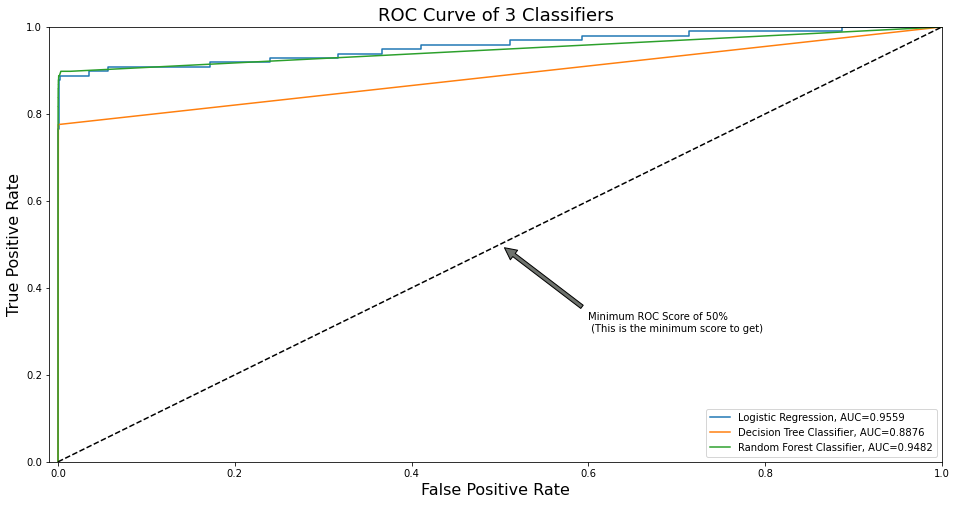

In [35]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve of 3 Classifiers', fontsize=18)
    
## Logistic Regression Classifier
fpr, tpr, _ = metrics.roc_curve(original_ytest, y_pred_logreg)
auc = round(metrics.roc_auc_score(original_ytest, y_pred_logreg), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


## Decision Tree Classifier
fpr, tpr, _ = metrics.roc_curve(original_ytest, y_pred_decstr)
auc = round(metrics.roc_auc_score(original_ytest, y_pred_decstr), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))


## Random Forest Classifier
fpr, tpr, _ = metrics.roc_curve(original_ytest, y_pred_randfor)
auc = round(metrics.roc_auc_score(original_ytest, y_pred_randfor), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05),
            )

    
plt.legend()

# Model Improvement Using Sampling Techniques

Data sampling is the statistical method for selecting data points (here, the data point is a single row) from the whole dataset. In machine learning problems, there are many sampling techniques available.

Here we take **undersampling and oversampling** strategies for handling imbalanced data.  

**What is this undersampling and oversampling?**

Let us take an example of a dataset that has nine samples. 

- Six samples belong to class-0,
- Three samples belong to class-1
- Oversampling = 6 class-0 samples x  2 times of class-1 samples of 3
- Undersampling = 3 Class-1 samples x 3 samples from Class-0

Here what we are trying to do is the number of samples of both target classes to be equal. 

In the **oversampling** technique, samples are repeated, and the dataset size is larger than the original dataset.

In the **undersampling** technique, samples are not repeated, and the dataset size is less than the original dataset.

# Apply on undersampled data

For undersampling techniques, we are checking the number of samples of both classes and selecting the smaller number and taking random samples from other class samples to create a new dataset.  

The new dataset has an equal number of samples for both target classes.

That is how random undersampling works.

## Random Undersampling

In [40]:
from imblearn.under_sampling import RandomUnderSampler
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
#fit and apply the transform
X_under, y_under = undersample.fit_resample(original_Xtrain, original_ytrain)

In [41]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(original_ytrain))

Before sampling class distribution:- Counter({0: 227451, 1: 394})


In [42]:
# new class distribution 
print('New class distribution:-',Counter(y_under))

New class distribution:- Counter({0: 394, 1: 394})


In [43]:
# Distribution of Class column
df_under = pd.concat([X_under, y_under], axis=1)
class_counts=df_under.Class.value_counts()
class_counts

1    394
0    394
Name: Class, dtype: int64

Text(0, 0.5, 'counts')

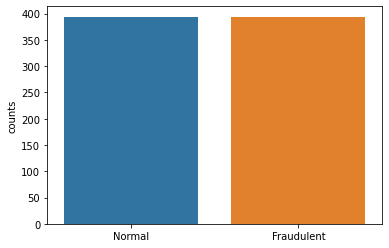

In [44]:
g=sns.barplot(x=class_counts.index,y=class_counts.values)
g.set_xticklabels(['Normal','Fraudulent'])
g.set_ylabel('counts')

## Logistic Regression Classifier

In [45]:
y_pred_under_logreg = logistic_regression_classifier(X_under, y_under, original_Xtest, original_ytest)

Model training starts........
Model training completed
Logistic Regression Classifier Accuracy Score on Train set: 95.6853%
Final result using test dataset:
Logistic Regression Classifier Accuracy Score on Test set: 95.8042%
Confusion Matrix :- 
 [[54481  2383]
 [    7    91]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.96      0.98     56962



## Decision Tree Classifier

In [46]:
y_pred_under_decstr = decision_tree_classifier(X_under, y_under, original_Xtest, original_ytest)

Model training starts........
Model training completed
Decision Tree Classifier Accuracy Score on Train set: 100.0000%
Final result using test dataset:
Decision Tree Classifier Accuracy Score on Test set: 89.7879%
Confusion Matrix :- 
 [[51052  5812]
 [    5    93]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.90      0.94     56962



## Random Forest Classifier

In [47]:
y_pred_under_randfor = random_forest_classifier(X_under, y_under, original_Xtest, original_ytest)

Model training starts........
Model training completed
Random Forest Classifier Accuracy Score on Train set: 100.0000%
Final result using test dataset:
Random Forest Classifier Accuracy Score on Test set: 96.2414%
Confusion Matrix :- 
 [[54731  2133]
 [    8    90]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



## Plot ROC Curve

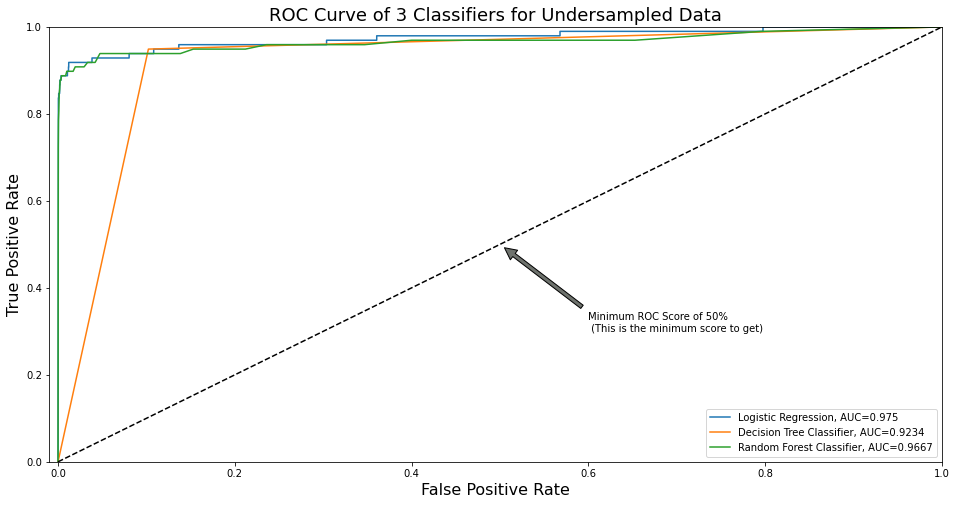

In [48]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve of 3 Classifiers for Undersampled Data', fontsize=18)
    
## Logistic Regression Classifier
fpr, tpr, _ = metrics.roc_curve(original_ytest, y_pred_under_logreg)
auc = round(metrics.roc_auc_score(original_ytest, y_pred_under_logreg), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


## Decision Tree Classifier
fpr, tpr, _ = metrics.roc_curve(original_ytest, y_pred_under_decstr)
auc = round(metrics.roc_auc_score(original_ytest, y_pred_under_decstr), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))


## Random Forest Classifier
fpr, tpr, _ = metrics.roc_curve(original_ytest, y_pred_under_randfor)
auc = round(metrics.roc_auc_score(original_ytest, y_pred_under_randfor), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05),
            )

    
plt.legend()

# Apply on oversampled data

For oversampling techniques, we are checking the number of samples of both classes and duplicate the minor class data to prepare a balanced data for training. 

The new dataset has an equal number of samples for both target classes.

That is how random oversampling works.

## Random Oversampling

In [49]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
#fit and apply the transform
X_over, y_over = oversample.fit_resample(original_Xtrain, original_ytrain)

In [50]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(original_ytrain))

Before sampling class distribution:- Counter({0: 227451, 1: 394})


In [51]:
# new class distribution 
print('New class distribution:-',Counter(y_over))

New class distribution:- Counter({0: 227451, 1: 227451})


In [52]:
# Distribution of Class column
df_over = pd.concat([X_over, y_over], axis=1)
class_counts=df_over.Class.value_counts()
class_counts

1    227451
0    227451
Name: Class, dtype: int64

Text(0, 0.5, 'counts')

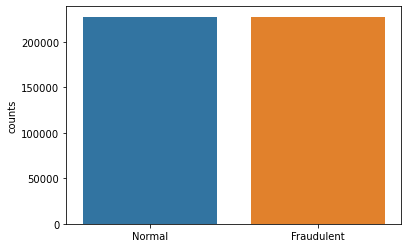

In [53]:
g=sns.barplot(x=class_counts.index,y=class_counts.values)
g.set_xticklabels(['Normal','Fraudulent'])
g.set_ylabel('counts')

## Logistic Regression Classifier

In [54]:
y_pred_over_logreg = logistic_regression_classifier(X_over, y_over, original_Xtest, original_ytest)

Model training starts........
Model training completed
Logistic Regression Classifier Accuracy Score on Train set: 95.2460%
Final result using test dataset:
Logistic Regression Classifier Accuracy Score on Test set: 97.4369%
Confusion Matrix :- 
 [[55412  1452]
 [    8    90]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



## Decision Tree Classifier

In [55]:
y_pred_over_decstr = decision_tree_classifier(X_over, y_over, original_Xtest, original_ytest)

Model training starts........
Model training completed
Decision Tree Classifier Accuracy Score on Train set: 100.0000%
Final result using test dataset:
Decision Tree Classifier Accuracy Score on Test set: 99.9140%
Confusion Matrix :- 
 [[56843    21]
 [   28    70]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.71      0.74        98

    accuracy                           1.00     56962
   macro avg       0.88      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962



## Random Forest Classifier

In [56]:
y_pred_over_randfor = random_forest_classifier(X_over, y_over, original_Xtest, original_ytest)

Model training starts........
Model training completed
Random Forest Classifier Accuracy Score on Train set: 100.0000%
Final result using test dataset:
Random Forest Classifier Accuracy Score on Test set: 99.9579%
Confusion Matrix :- 
 [[56861     3]
 [   21    77]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## Plot ROC Curve

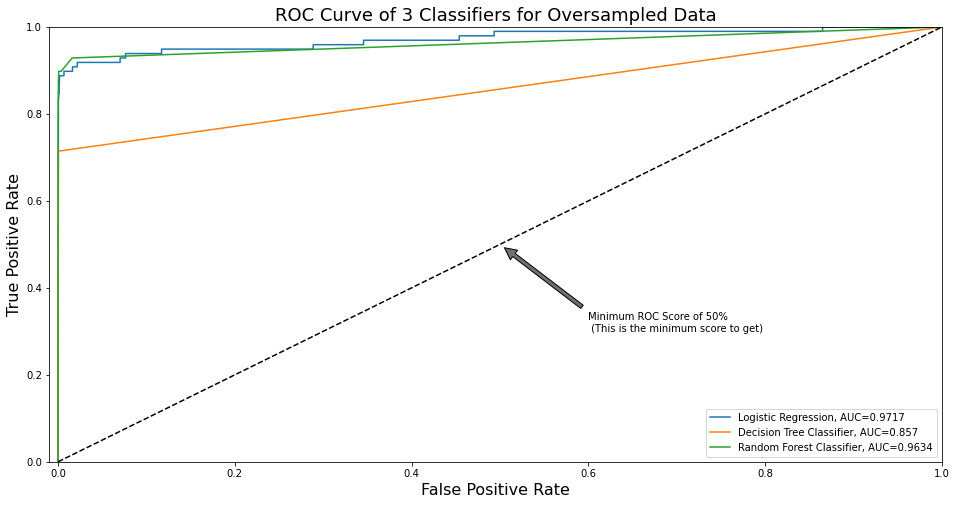

In [57]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve of 3 Classifiers for Oversampled Data', fontsize=18)
    
## Logistic Regression Classifier
fpr, tpr, _ = metrics.roc_curve(original_ytest, y_pred_over_logreg)
auc = round(metrics.roc_auc_score(original_ytest, y_pred_over_logreg), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


## Decision Tree Classifier
fpr, tpr, _ = metrics.roc_curve(original_ytest, y_pred_over_decstr)
auc = round(metrics.roc_auc_score(original_ytest, y_pred_over_decstr), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))


## Random Forest Classifier
fpr, tpr, _ = metrics.roc_curve(original_ytest, y_pred_over_randfor)
auc = round(metrics.roc_auc_score(original_ytest, y_pred_over_randfor), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05),
            )

    
plt.legend()